In [1]:
#資料預處理
#載入內建的MNIST dataset，並import matplotlib，以方便稍後顯示圖形及繪圖。
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(10)

#載入Train及Test dataset並顯示其維度，例如X_train有60000筆28×28的data。
(X_train,y_train),(X_test,y_test) = mnist.load_data()

print("X_train.shape={}, y_train.shape={}".format(X_train.shape,y_train.shape))
print("X_test.shape={}, y_test.shape={}".format(X_test.shape,y_test.shape))

Using TensorFlow backend.


X_train.shape=(60000, 28, 28), y_train.shape=(60000,)
X_test.shape=(10000, 28, 28), y_test.shape=(10000,)


In [2]:
#我們必須將X_train及X_test dataset由原本三維轉為四維矩陣以符合CNN的需求
#這是因為RGB圖片的格式為為width, height, channels，加上ID數維度為4。
#MNIST圖片為灰階因此其channel為1，轉換後的shape為(ID, width, height, channel)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')

X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

print('X_train.shape={}'.format(X_train.shape))

print('X_test.shape={}'.format(X_test.shape))

X_train.shape=(60000, 28, 28, 1)
X_test.shape=(10000, 28, 28, 1)


In [3]:
#將dataset的特徵值進行標準化，方法是除以255（因為圖像的像素點介於0~255之間），可讓所有的特徵值介於0與1之間。
#除了可提昇模型預測的準確度，梯度運算時也能更快收斂。
X_train = X_train / 255

X_test = X_test / 255

#這步是之前所介紹過的Onehot encoding，將彼此間不相關且非有序的categories轉換為連續性且是有序數值。
y_train = np_utils.to_categorical(y_train)

y_test_categories = y_test

y_test = np_utils.to_categorical(y_test)

In [4]:
#CNN模型的建立

#匯入建立模型所必要的模組
from keras.models import Sequential

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

#建立一個線性堆疊模型，之後我們只要將建立的神經網路層依次加入即可。
model = Sequential()

#建立第一個卷積層並加入model，該層有16個filters（即我們稱的filter或kernel）
#kernel大小為3×3，卷積後的圖形大小不變（即圖像周圍會補值）
#輸入的圖形維度為28x28x1，使用relu啟動函數。
#由於定義了16個filters，因此本層會輸出16個28×28的影像。
model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))

#接下來是池化層，本層參數比較少，我們只要定義pool size為(2,2)，即尺寸縮小為一半。
#本層接收了上一層卷積層的16個28×28影像後，會輸出16個14×14的影像。
model.add(MaxPooling2D(pool_size=(2, 2)))

#再建立第二個卷積層，這次我們定義該層有36個filters，kernel大小為3×3，卷積後的圖形大小不變（即圖像周圍會補值）
#輸入的圖形維度為(14,14,1)但可省略因為Keras,會自動判斷，使用relu啟動函數。由於定義了36個filters，因此本層會輸出36個14×14的影像。
model.add(Conv2D(filters=36, kernel_size=(3, 3), padding='same', activation='relu'))

#加入第二個池化層，參數與第一個池化層完全相同。本層會接收36個14×14影像後，輸出36個7×7的影像。\
model.add(MaxPooling2D(pool_size=(2, 2)))

#再建立第三個卷積層，這次我們定義該層有36個filters，kernel大小為3×3，卷積後的圖形大小不變（即圖像周圍會補值）
#輸入的圖形維度為(7,7,1)但可省略因為Keras,會自動判斷，使用relu啟動函數。由於定義了36個filters，因此本層會輸出36個5×5的影像。
model.add(Conv2D(filters=72, kernel_size=(3, 3), padding='same', activation='relu'))

#加入第三個池化層，參數與第一個池化層完全相同。本層會接收36個14×14影像後，輸出36個7×7的影像。\
model.add(MaxPooling2D(pool_size=(2, 2)))

#在各兩層的卷積與池化後，我們加入Dropout層
#記得Dropout有什麼作用嗎？它最大的功用是減少過度擬合。
#在深度學習的訓練過程中，Dropout會讓每次batch run都依據機率丟棄一定比例的神經元不予計算，使得每一次都好像在訓練不同的神經網路一樣。
#下方的程式中，我們定義該Dropout層每次訓練時要丟棄50%的神經元。
model.add(Dropout(0.5))

#接著我們需要一個平坦層，將特徵值轉為一維資料以供後續的全連結層使用。本層接收第二個池化層傳來的36x7x7（=1764）資料之後，轉為1維的1764。
model.add(Flatten())
    
#建立全連結層中的隱藏層(即傳統神經網路中的全連結層)，指定其神經元數目為128個（此數目可調整），啟用函數使用Relu。
model.add(Dense(128, activation='relu'))

#再加入一層Dropout來防止過度擬合。(此層亦可省略，我們可視執行結果來決定)
model.add(Dropout(0.5))
    
#本模型的最後一層是輸出層，也就是要輸出十種0~9的分類值，一般我們都會使用softmax作為分類模型輸出層的啟動函數。
model.add(Dense(10, activation='softmax'))

#最後來使用summary指令review一下整個model吧。
model.summary()        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        5220      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 72)          23400     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 72)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 72)          0         
__________

In [5]:
#訓練模型
#在訓練之前，要使用compile來定義訓練的參數。
#損失函數使用深度學習分類模型中最常用的交叉熵cross entropy，梯度下降法採取最常用的adam，模型的評估方式則是以accuracy為優先。

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#使用fit指令可開始訓練本CNN模型。x與y分別傳入特徵值及分類值。
train_history=model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), validation_split=0.2, epochs=5, batch_size=300, verbose=2)

#評估訓練結果
#定義一個show_train_history函式，我們只要將結果丟入，便可繪成圖表。

def show_train_history(train_history, train, validation):

    plt.plot(train_history.history[train])

    plt.plot(train_history.history[validation])

    plt.title('Train History')

    plt.ylabel('train')

    plt.xlabel('Epoch')

    plt.legend(['train', 'validation'], loc='center right')

    plt.show()



Train on 60000 samples, validate on 10000 samples
Epoch 1/5
71s - loss: 0.6059 - acc: 0.8017 - val_loss: 0.0892 - val_acc: 0.9712
Epoch 2/5
67s - loss: 0.1666 - acc: 0.9492 - val_loss: 0.0582 - val_acc: 0.9823
Epoch 3/5
68s - loss: 0.1185 - acc: 0.9635 - val_loss: 0.0423 - val_acc: 0.9873
Epoch 4/5
64s - loss: 0.0990 - acc: 0.9706 - val_loss: 0.0350 - val_acc: 0.9884
Epoch 5/5
64s - loss: 0.0849 - acc: 0.9744 - val_loss: 0.0303 - val_acc: 0.9889


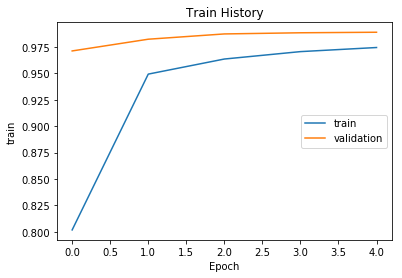

In [6]:
#顯示train與test dataset訓練過程的準確率。
show_train_history(train_history, 'acc','val_acc')


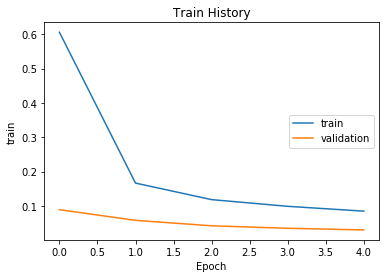

In [7]:
#顯示train與test dataset訓練過程的誤差率。
show_train_history(train_history, 'loss','val_loss')

In [8]:
#我們使用test dataset來評估模型的準確率。
scores = model.evaluate(X_test, y_test)

scores[1]

 9920/10000 [============================>.] - ETA: 0s

0.9889

In [9]:
#混淆矩陣
import pandas as pd

prediction = model.predict_classes(X_test)

print(y_test.shape)

pd.crosstab(y_test_categories, prediction, rownames=['label'], colnames=['predict'])

 9952/10000 [============================>.] - ETA: 0s(10000, 10)


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,0,1,0,0,0,1,1,1,0
1,0,1131,2,0,0,0,1,1,0,0
2,1,0,1028,0,0,0,0,2,1,0
3,0,0,1,1004,0,3,0,1,1,0
4,0,0,0,0,974,0,2,0,0,6
5,1,0,0,4,0,886,1,0,0,0
6,6,2,0,0,1,2,944,0,3,0
7,0,1,12,3,0,1,0,1005,2,4
8,2,0,2,1,2,2,1,2,960,2
